In [23]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
from matplotlib import pyplot as plt 

# Data collection and processing

In [24]:
# loading data

df=pd.read_csv('archive (1)/car data.csv')

In [25]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
df.shape


(301, 9)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [28]:
# checking missing value number
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [29]:
# checking distribution of categorical data

df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [30]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [31]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

## Converting categorical to numeric - encoding

In [32]:
df.replace({'Fuel_Type' :{'Petrol':0,'Diesel':1,'CNG':2}} ,inplace=True)

In [33]:
df.replace({'Seller_Type' :{'Dealer':0,'Individual':1}} ,inplace=True)

In [34]:
df.replace({'Transmission' :{'Manual':0,'Automatic':1}} ,inplace=True)

In [35]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


### Split data into train and test

In [36]:
X=df.drop(['Car_Name', 'Selling_Price' ],axis=1)
Y=df['Selling_Price']

In [39]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [40]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(X,Y, test_size=0.1, random_state=2)

In [45]:
xtr

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,0,0,0,0
249,2016,7.600,17000,0,0,0,0
277,2015,13.600,21780,0,0,0,0
194,2008,0.787,50000,0,1,0,0
244,2013,9.400,49000,1,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0,0
22,2011,8.010,50000,0,0,1,0
72,2013,18.610,56001,0,0,0,0
15,2016,10.790,43000,1,0,0,0


In [46]:
ytr.shape

(270,)

### Model Training

In [47]:
#  1. LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(xtr,ytr)

LinearRegression()

### Model evaluation

In [48]:
prediction =model.predict(xtr)

In [49]:
# r squared error
from sklearn import metrics
error_score=metrics.r2_score(ytr, prediction)
error_score

0.8799451660493699

Text(0.5, 1.0, 'Actual vs predicted price')

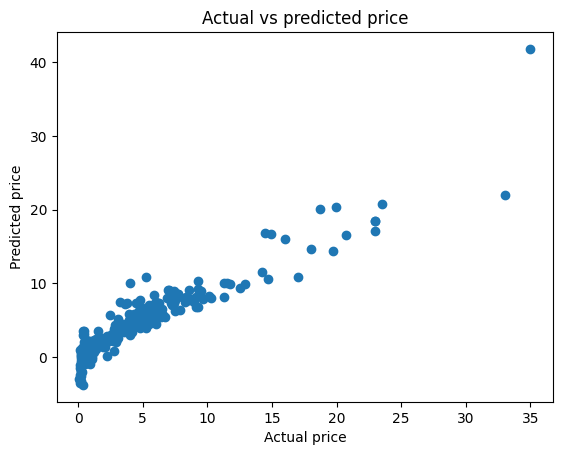

In [50]:
## Visualize actual and predicted prices

plt.scatter(ytr,prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted price')

In [53]:
# predict test data
test_prediction=model.predict(xts)


In [54]:
error_score=metrics.r2_score(yts, test_prediction)

In [55]:
error_score

0.8365766715026473

Text(0.5, 1.0, 'Actual vs predicted price')

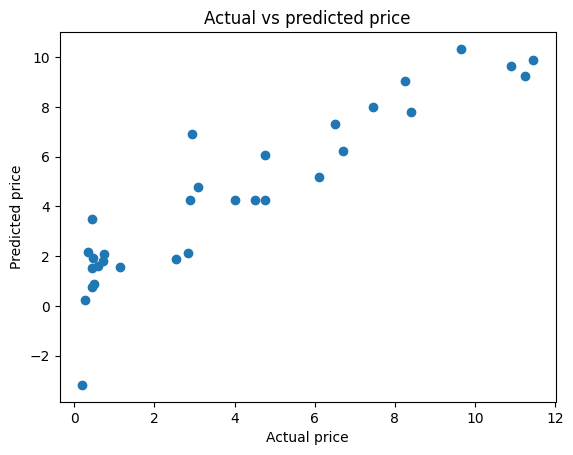

In [56]:
## Visualize actual and predicted prices

plt.scatter(yts,test_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted price')

## 2. Lasso regression

In [57]:
#  1. LINEAR REGRESSION
from sklearn.linear_model import Lasso

model=Lasso()
model.fit(xtr,ytr)

Lasso()

In [58]:
prediction =model.predict(xtr)

In [59]:
# r squared error
from sklearn import metrics
error_score=metrics.r2_score(ytr, prediction)
error_score

0.8427856123435795

Text(0.5, 1.0, 'Actual vs predicted price')

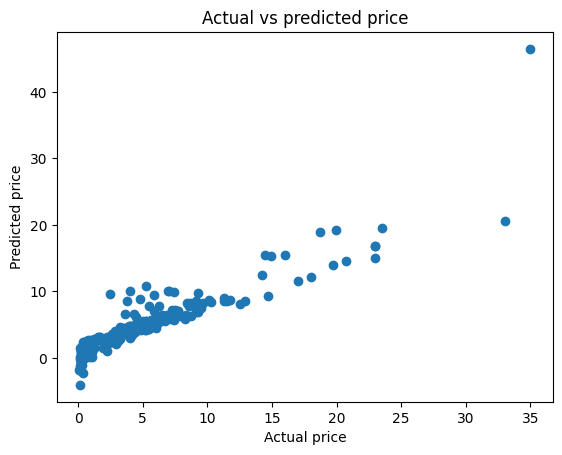

In [60]:
## Visualize actual and predicted prices

plt.scatter(ytr,prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted price')

In [61]:
# predict test data
test_prediction=model.predict(xts)


In [62]:
error_score=metrics.r2_score(yts, test_prediction)

In [63]:
error_score

0.8709167941173201

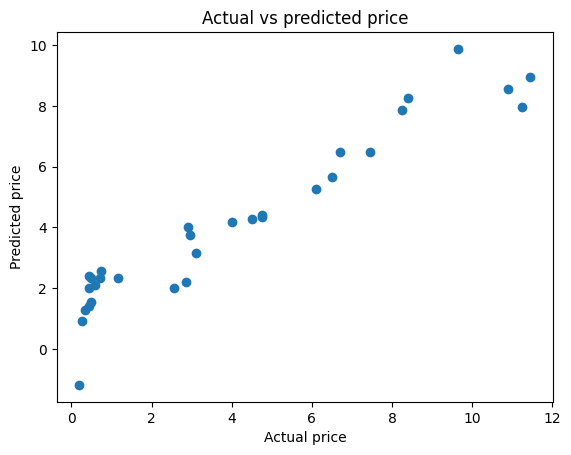

In [65]:
## Visualize actual and predicted prices

plt.scatter(yts,test_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted price')
plt.show()